#### Tensors

In [1]:
import torch
import numpy as np

In [2]:
# Initializing a Tensor

# 1. From data

data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [3]:
x_data

tensor([[1, 2],
        [3, 4]])

In [4]:
# 2. From numpy array

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_data

tensor([[1, 2],
        [3, 4]])

In [5]:
print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



In [6]:
# 3. From another Tensor

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0915, 0.9139],
        [0.2746, 0.0288]]) 



In [7]:
# 4. With random or constant values

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3694, 0.0082, 0.5964],
        [0.0957, 0.0900, 0.2203]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [8]:
# Attributes of a Tensor

tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
tensor

tensor([[0.6240, 0.7727, 0.5752, 0.7364],
        [0.9086, 0.7419, 0.3698, 0.9716],
        [0.7209, 0.1308, 0.2823, 0.6717]])

#### Operations on Tensor

By default, tensors are created on the CPU. Tensors can also be computed to GPUs - to do that, you need to move them using the .to method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!

In [11]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [12]:
# 1. Numpy-like indexing and slicing

tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [13]:
# 2. Joining Tensors

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [14]:
# Arithmetic Operations

# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [18]:
y1
y2
y3
z1

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [19]:
# Single-element tensors
# If you have a one-element tensor, for example by aggregating all values of a tensor into one value, 
#you can convert it to a Python numerical value using item():

agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


In [21]:
agg_item

12.0

In [22]:
# In-place operations

# Operations that store the result into the operand are called in-place. 
# They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.
# Note: In-place operations save some memory, but can be problematic when computing derivatives 
# because of an immediate loss of history. Hence, their use is discouraged.

print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [23]:
# Bridge with NumPy
# Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will 
# change the other.

# Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [24]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [25]:
# Numpy array to Tensor

n = np.ones(5)
t = torch.from_numpy(n)

In [26]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


Changes in the numpy array reflects in the tensor

### Loading and normalizing datasets

#### Datasets and Dataloaders

Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of sample pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. 

#### Loading a dataset

We will be loading the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando’s article images consisting of of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.
Each image is 28 pixels in height and 28 pixels in width, with a total of 784 pixels
The 10 classes tell what type of image it is. For example: T-shirt/top, Trouser, Pullover, Dress, Bag, Ankle boot etc.

The grayscale are values between 0 to 255 that measure the intensity of black and white images. The intensity value increase from white to black. For example: a white color will be 0, while a black color will 255.

We load the FashionMNIST Dataset with the following parameters:

* root is the path where the train/test data is stored,
* train specifies training or test dataset,
* download=True downloads the data from the Internet if it's not available at root.
* transform and target_transform specify the feature and label transformations

In [27]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [28]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [29]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

#### Iterating and Visualizing the Dataset

We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

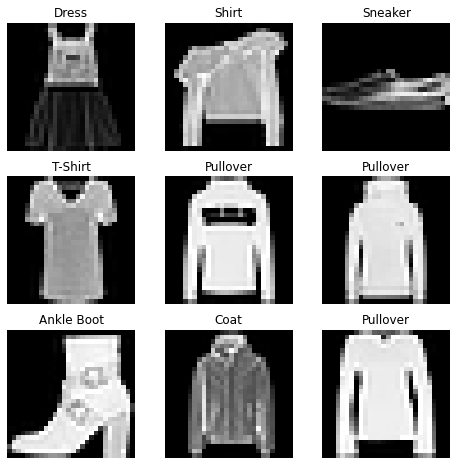

In [35]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Preparing your data for training with DataLoaders

The Dataset retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to speed up data retrieval.

In machine learning, you need to specify what the feature and label are in your dataset. Features are input and labels are output. We train use features and train the model to predict the label.

Labels are what 10 class types: T-shirt, Sandal, Dress etc
Features are the patterns in the images pixels

The DataLoader is an iterable that abstracts this complexity for us in an easy API. We use the Dataloader, we need to set the following paraments:

* data - the training data that will be used to train the model; and test data to evaluate the model
* batch size - the number of records to be processed in each batch
* shuffle the randoms sample of the data by indices

In [36]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [39]:
train_dataloader

In [40]:
test_dataloader

#### Iterate through the DataLoader

We have loaded that dataset into the Dataloader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


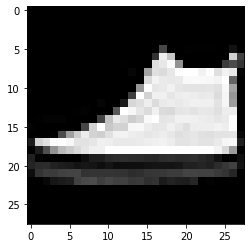

Label: 7


In [41]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Normalization

Normalization is a common data pre-processing technique that is applied to scale or transform the data to make sure there's an equal learning contribution from each feature. For example, each pixel in the grayscale images have a value between 0 and 255, which are features. If one pixel value is 17 and another pixel is 197. There will be an uneven distribution of the pixel importance, because the higher pixel volumes will deviate the learning. Normalization changes the range of your data, without distorting its distintion among out feature. 

This pre-processing is to avoid:

* A reduction of the prediction accuracy
* Difficulty for the model to learn
* Unfavorable distribution of the feature data ranges

#### Transforms

Data does not always come in its final processed form that is required for training machine learning algorithms. We use transforms to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters (transform to modify the features and target_transform to modify the labels) that accept callables containing the transformation logic. The torchvision.transforms module offers several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

In [43]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [44]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

#### ToTensor()

ToTensor converts a PIL image or NumPy ndarray into a FloatTensor and scales the image's pixel intensity values in the range [0., 1.]

#### Lambda transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter which assigns a value=1 on the index as given by the label y. You can also use torch.nn.functional.one_hot as another option to do that.

In [45]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

In [46]:
target_transform

Lambda()

### Neural Network

#### What is a neural network? 

Neural network is a collection of neurons that are connected by layers. Each neuron is a small computing unit that performs simple calculations to collectively solve a problem. They are organized in layers. There are 3 types of layers: input layer, hidden layer and outter layer. Each layer contains a number of neurons, except for the input layer. Neural networks mimic the way a human brain processes information.

Components of a neural network
Activation function determines whether a neuron should be activated or not. The computations that happen in a neural network include applying an activation function. If a neuron activates, then it means the input is important. The are different kinds of activation functions. The choice of which activation function to use depends on what you want the output to be. Another important role of an activation function is to add non-linearity to the model.

* Binary used to set an output node to 1 if function result is positive and 0 if the function result is negative. 
 
* Sigmod is used to predict the probability of an output node being between 0 and 1.  
 
* Tanh is used to predict if an output node is between 1 and -1. Used in classification use cases. 
 
* ReLU used to set the output node to 0 if fuction result is negative and keeps the result value if the result is a positive value.  
 
Weights influence how well the output of our network will come close to the expected output value. 

As an input enters the neuron, it gets multiplied by a weight value and the resulting output is either observed, or passed to the next layer in the neural network. Weights for all neurons in a layer are organized into one tensor

Bias makes up the difference between the activation function's output and its intended output. A low bias suggest that the network is making more assumptions about the form of the output, whereas a high bias value makes less assumptions about the form of the output.

In [47]:
%matplotlib inline
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [48]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


Define the class

We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

Our neural network are composed of the following:

* The input layer with 28x28 or 784 features/pixels.
* The first linear module takes the input 784 features and transforms it to a hidden layer with 512 features
* The ReLU activation function will be applied in the transformation
* The second linear module take 512 features as input from the first hidden layer and transforms it to the next hidden layer with 512 features
* The ReLU activation function will be applied in the transformation
* The third linear module take 512 features as input from the second hidden layer and transforms it to the output layer with 10, which is the number of classes
* The ReLU activation function will be applied in the transformation

In [49]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [50]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [51]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X) 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([0])


#### Weight and Bias

The nn.Linear module randomly initializes the weights and bias for each layer and internally stores the values in Tensors.

In [52]:
print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")

print(f"First Linear weights: {model.linear_relu_stack[0].bias} \n")

First Linear weights: Parameter containing:
tensor([[-0.0075, -0.0063, -0.0177,  ...,  0.0068, -0.0305,  0.0317],
        [ 0.0153, -0.0282, -0.0018,  ...,  0.0314,  0.0302, -0.0013],
        [ 0.0270, -0.0014, -0.0130,  ...,  0.0197,  0.0167,  0.0348],
        ...,
        [ 0.0068, -0.0224, -0.0348,  ..., -0.0066, -0.0214, -0.0041],
        [-0.0205,  0.0228, -0.0283,  ..., -0.0037, -0.0181,  0.0200],
        [-0.0163,  0.0210,  0.0212,  ...,  0.0277, -0.0019,  0.0166]],
       requires_grad=True) 

First Linear weights: Parameter containing:
tensor([-2.4686e-02, -1.4145e-02,  2.5632e-02, -1.8788e-02,  2.3101e-02,
        -1.5516e-02, -2.2981e-03, -2.4330e-02,  3.4067e-02, -1.4462e-02,
         1.9523e-02,  2.7911e-02,  2.5028e-02, -2.6767e-03,  6.5128e-03,
         3.3066e-02, -1.9164e-02,  5.0693e-03, -2.2971e-02,  4.7998e-03,
         3.3566e-02,  2.1927e-02,  8.0844e-04, -7.4269e-03, -3.4997e-02,
         1.8391e-02,  2.0202e-03, -1.4579e-02,  2.6380e-02,  1.8124e-02,
        -1.

#### Model layers

Let's break down the layers in the FashionMNIST model. To illustrate it, we will take a sample minibatch of 3 images of size 28x28 and see what happens to it as we pass it through the network.

In [53]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


#### nn.Flatten

We initialize the nn.Flatten layer to convert each 2D 28x28 image into a contiguous array of 784 pixel values (the minibatch dimension (at dim=0) is maintained). Each of the pixels are pass to the input layer of the neural network.

In [55]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [59]:
input_image
flat_image

tensor([[0.7155, 0.3447, 0.4943,  ..., 0.8211, 0.5648, 0.4984],
        [0.3674, 0.5599, 0.0748,  ..., 0.5421, 0.2912, 0.0978],
        [0.8447, 0.8559, 0.9184,  ..., 0.5830, 0.4699, 0.0251]])

#### nn.Linear

The linear layer is a module that applies a linear transformation on the input using it's stored weights and biases. The gayscale value of each pixel in the input layer will be connected to neurons in the hidden layer for calculation. The calculation used for the transformation is weights * input + bias

In [60]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### nn.ReLU

Non-linear activations are what create the complex mappings between the model's inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena. In this model, we use nn.ReLU between our linear layers, but there's other activations to introduce non-linearity in your model.

The ReLU activation function takes the output from the linear layer calculation and replaces the negative values with zeros.

ReLU = max(0,x)

x = weight * input + bias

In [61]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1852,  0.4639, -0.3602,  0.1875,  0.0384, -0.1733,  0.2722, -0.0175,
         -0.2187, -0.1235,  0.0070,  0.4329,  0.1992,  0.6661,  0.6487, -0.2233,
          0.0947, -0.7094,  0.1725,  0.3038],
        [ 0.2009,  0.5764, -0.3062,  0.4216,  0.3433, -0.1364, -0.1773, -0.0684,
          0.0098,  0.1442,  0.1669,  0.6113,  0.2728,  0.1726,  0.6037, -0.5498,
         -0.0141, -0.6771,  0.0998,  0.4295],
        [ 0.0976,  0.4688, -0.1078,  0.2447, -0.0832, -0.2877, -0.0254,  0.2482,
         -0.0781,  0.0177,  0.4059,  0.4381, -0.1784,  0.3811,  0.3785, -0.0117,
          0.2768, -0.0989,  0.1285,  0.2355]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1852, 0.4639, 0.0000, 0.1875, 0.0384, 0.0000, 0.2722, 0.0000, 0.0000,
         0.0000, 0.0070, 0.4329, 0.1992, 0.6661, 0.6487, 0.0000, 0.0947, 0.0000,
         0.1725, 0.3038],
        [0.2009, 0.5764, 0.0000, 0.4216, 0.3433, 0.0000, 0.0000, 0.0000, 0.0098,
         0.1442, 0.1669, 0.6113, 0.2728, 0.1726, 0.60

#### nn.Sequential

nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [62]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [64]:
input_image
logits

tensor([[ 0.0828, -0.0153, -0.3985, -0.0068, -0.3247,  0.2511,  0.1741,  0.0506,
         -0.0942,  0.1012],
        [ 0.0141, -0.0068, -0.2954,  0.0669, -0.3415,  0.2657,  0.1059,  0.1389,
         -0.1723,  0.1161],
        [-0.0612, -0.0833, -0.3402,  0.1332, -0.3056,  0.3236,  0.1127,  0.0747,
         -0.0403,  0.0826]], grad_fn=<AddmmBackward0>)

#### nn.Softmax

The last linear layer of the neural network returns logits - raw values in [-infty, infty], which are passed to the nn.Softmax module. The Softmax activation function is used to calculate the probability of the output from the neural network. It is only used on the output layer of a neural network. The results are scaled to values [0, 1] representing the model's predicted densities for each class. dim parameter indicates the dimension along which the result values must sum to 1. The node with the highest probability predicts the desired output.

In [65]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [67]:
softmax
pred_probab

tensor([[0.1086, 0.0985, 0.0671, 0.0993, 0.0723, 0.1285, 0.1190, 0.1052, 0.0910,
         0.1106],
        [0.1008, 0.0987, 0.0740, 0.1063, 0.0706, 0.1296, 0.1105, 0.1142, 0.0837,
         0.1116],
        [0.0933, 0.0913, 0.0706, 0.1134, 0.0731, 0.1372, 0.1111, 0.1069, 0.0953,
         0.1078]], grad_fn=<SoftmaxBackward0>)

#### Model parameters

Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model's parameters() or named_parameters() methods.
In this example, we iterate over each parameter, and print its size and a preview of its values.

In [68]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0075, -0.0063, -0.0177,  ...,  0.0068, -0.0305,  0.0317],
        [ 0.0153, -0.0282, -0.0018,  ...,  0.0314,  0.0302, -0.0013]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0247, -0.0141], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0147,  0.0258, -0.0363,  ...,  0.0130,  0.0057,  0.0410],
        [-0.0115,  0.0415, -0.0354,  ..., -0.0367,  0.0055, -0.0401]],
       grad_fn=<SliceBackward0>) 

Layer: linear_re

#### Automatic differentiation with torch.autograd

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter. The loss function calulates the difference between the expected output and the actual output that a neural network produces. The goal is to get the result of the loss function as close to zero as possible. The algorithm traverse backwards through the network network to adjust the weights and bias to retrain the model. That's why it's called back propagation. This back and forward process of retraining the model over time to reduce the loss to 0 is called the gradient descent.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

Consider the simplest one-layer neural network, with input x, parameters w and b, and some loss function. It can be defined in PyTorch in the following manner:

In [69]:
%matplotlib inline
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [71]:
loss

tensor(1.0499, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In this network, w and b are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables. In order to do that, we set the requires_grad property of those tensors.

Note: You can set the value of requires_grad when creating a tensor, or later by using x.requires_grad_(True) method.

A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor.

In [72]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7fd46160b4c0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fd4615c4d60>


#### Computing gradients
To optimize weights of parameters in the neural network, we need to compute the derivatives of our loss function with respect to parameters, namely, we need ∂loss/∂w and ∂loss/∂b under some fixed values of x and y. To compute those derivatives, we call loss.backward(), and then retrieve the values from w.grad and b.grad:

In [73]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3029, 0.1717, 0.0103],
        [0.3029, 0.1717, 0.0103],
        [0.3029, 0.1717, 0.0103],
        [0.3029, 0.1717, 0.0103],
        [0.3029, 0.1717, 0.0103]])
tensor([0.3029, 0.1717, 0.0103])


### Optimizing the model parameters

Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration (called an epoch). The model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters (as we saw in the previous module), and optimizes these parameters using gradient descent.

We will load the code from the previous modules on Datasets & DataLoaders and Build Model

In [74]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

#### Setting hyperparameters

Hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and the level of accuracy.

We define the following hyperparameters for training:

* Number of Epochs - the number times the entire training dataset is pass through the network.
* Batch Size - the number of data samples seen by the model in each epoch. Iterates are the number of batches needs to compete an epoch.
* Learning Rate - the size of steps the model match as it searchs for best weights that will produce a higher model accuracy. Smaller values means the model will take a longer time to find the best weights, while larger values may result in the model step over and misses the best weights which yields unpredictable behavior during training.

In [75]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

#### Add an optimization loop

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

Each epoch consists of two main parts:

* The Train Loop - iterate over the training dataset and try to converge to optimal parameters.
* The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop. Jump ahead to see the full-impl-label of the optimization loop.

#### Add a loss function

When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include:

* nn.MSELoss (Mean Square Error) used for regression tasks
* nn.NLLLoss (Negative Log Likelihood) used for classification
* nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss

We pass our model's output logits to nn.CrossEntropyLoss, which will normalize the logits and compute the prediction error.

In [76]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [77]:
loss_fn

CrossEntropyLoss()

#### Optimization pass

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM' and 'RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.

In [78]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [79]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

Inside the training loop, optimization happens in three steps:

* Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
* Back-propagate the prediction loss with a call to loss.backwards(). PyTorch deposits the gradients of the loss w.r.t. each parameter.
* Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.

#### Full implementation

We define train_loop that loops over our optimization code, and test_loop that evaluates the model's performance against our test data.

In [80]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to train_loop and test_loop. Feel free to increase the number of epochs to track the model's improving performance.

In [82]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.642771  [    0/60000]
loss: 1.542244  [ 6400/60000]
loss: 1.410658  [12800/60000]
loss: 1.286105  [19200/60000]
loss: 1.185459  [25600/60000]
loss: 1.461790  [32000/60000]
loss: 1.329268  [38400/60000]
loss: 1.498234  [44800/60000]
loss: 1.513252  [51200/60000]
loss: 1.187042  [57600/60000]
Test Error: 
 Accuracy: 55.9%, Avg loss: 0.021342 

Epoch 2
-------------------------------
loss: 1.613605  [    0/60000]
loss: 1.521411  [ 6400/60000]
loss: 1.382055  [12800/60000]
loss: 1.263778  [19200/60000]
loss: 1.165856  [25600/60000]
loss: 1.440478  [32000/60000]
loss: 1.308721  [38400/60000]
loss: 1.480896  [44800/60000]
loss: 1.491123  [51200/60000]
loss: 1.168526  [57600/60000]
Test Error: 
 Accuracy: 57.2%, Avg loss: 0.021047 

Epoch 3
-------------------------------
loss: 1.587051  [    0/60000]
loss: 1.502680  [ 6400/60000]
loss: 1.357154  [12800/60000]
loss: 1.245018  [19200/60000]
loss: 1.150028  [25600/60000]
loss: 1.421898  [32000/600

#### Saving Models

When you are satisfied with the model's performance, you can use torch.save to save it. PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted wit the torch.save method:

In [84]:
torch.save(model.state_dict(), "data/model.pth")

print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


#### Load and run model predictions

In [85]:
%matplotlib inline
import torch
from torch import nn
import torchvision.models as models
from torchvision import datasets
from torchvision.transforms import ToTensor

To load the model, we will define the model class which contains the state and parameters of the neural network used to train the model.

In [86]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. Next, we load the parameters using the load_state_dict() method.

In [87]:
model = NeuralNetwork()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

### The full model building process

#### Working with data

PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.

In [88]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [89]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


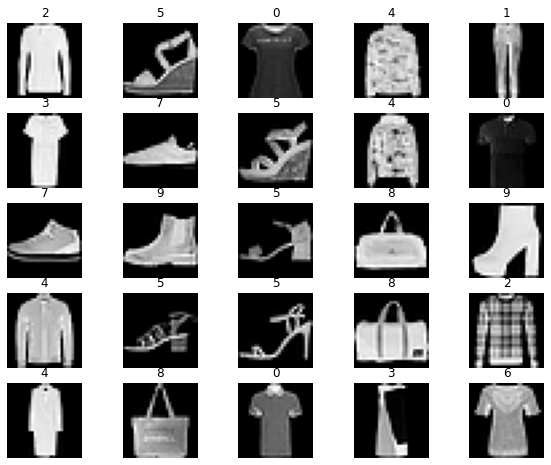

In [90]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break
    
# Display sample data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Creating models
To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

In [91]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


#### Optimizing the Model Parameters
To train a model, we need a loss function and an optimizer. We'll be using nn.CrossEntropyLoss for loss and Stochastic Gradient Descent for optimization.

In [92]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and back-propagates the prediction error to adjust the model's parameters.

In [93]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We can also check the model's performance against the test dataset to ensure it is learning.

In [94]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (epochs). During each epoch, the model learns parameters to make better predictions. We print the model's accuracy and loss at each epoch; we'd like to see the accuracy increase and the loss decrease with every epoch.

In [95]:
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301278  [    0/60000]
loss: 2.297473  [ 6400/60000]
loss: 2.293140  [12800/60000]
loss: 2.298362  [19200/60000]
loss: 2.278559  [25600/60000]
loss: 2.256643  [32000/60000]
loss: 2.268316  [38400/60000]
loss: 2.243476  [44800/60000]
loss: 2.250441  [51200/60000]
loss: 2.221965  [57600/60000]
Test Error: 
 Accuracy: 37.1%, Avg loss: 0.035098 

Epoch 2
-------------------------------
loss: 2.233614  [    0/60000]
loss: 2.241545  [ 6400/60000]
loss: 2.221869  [12800/60000]
loss: 2.248045  [19200/60000]
loss: 2.188078  [25600/60000]
loss: 2.144605  [32000/60000]
loss: 2.180475  [38400/60000]
loss: 2.129984  [44800/60000]
loss: 2.166994  [51200/60000]
loss: 2.087362  [57600/60000]
Test Error: 
 Accuracy: 38.1%, Avg loss: 0.033318 

Epoch 3
-------------------------------
loss: 2.134712  [    0/60000]
loss: 2.130154  [ 6400/60000]
loss: 2.097034  [12800/60000]
loss: 2.146232  [19200/60000]
loss: 2.021415  [25600/60000]
loss: 1.971309  [32000/600

In [96]:
torch.save(model.state_dict(), "data/model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [97]:
model = NeuralNetwork()
model.load_state_dict(torch.load("data/model.pth"))

<All keys matched successfully>

In [98]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
